# Examples for DS Lecture, Week 3
*Phong Nguyen, 10 Oct 2018*

## Binomial distribution

#### Task: Draw samples from a Binomial distribution and visualise them
- a straightforward way: use a library like [numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html)
- a fun way: simulate data by hands

In [17]:
n = 10000
p = 0.2

First, simulate a biased coin with probability of Head as $p$.

In [2]:
from random import random

def flip_coin(p):
    'Return H or T with probability of H as p.'
    return 'H' if random() <= p else 'T'

In [3]:
flip_coin(p)

'T'

Test by flipping the coin 100 times.

In [7]:
from collections import Counter

coins = [flip_coin(p) for _ in range(100)]
print(coins)
print(Counter(coins))

['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T']
Counter({'T': 78, 'H': 22})


Flip the coin $n$ times to simulate Binomial distributed data.

In [8]:
def run_experiment(n, p):
    'Flip the coins n times and return the number of heads.'
    coins = [flip_coin(p) for _ in range(n)]
    return Counter(coins)['H']

In [14]:
run_experiment(n, p)

2000793

The result of each experiment is a sample drawn from a Binomial distribution $B(n,p)$.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_barchart(data):
    counts = Counter(data)
    plt.bar(counts.keys(), counts.values(), width=0.9)
    plt.show()    

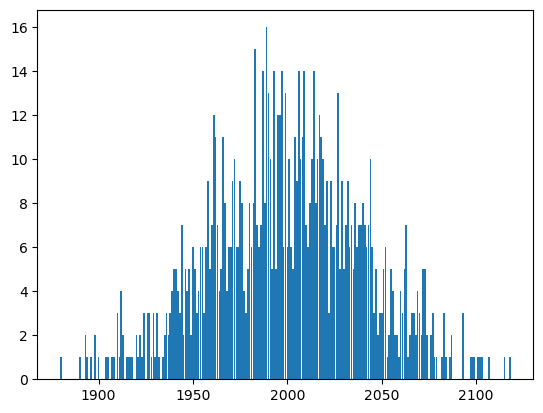

In [18]:
sample_size = 1000
data = [run_experiment(n, p) for _ in range(sample_size)] 
draw_barchart(data)

Just to double check with `numpy` library.

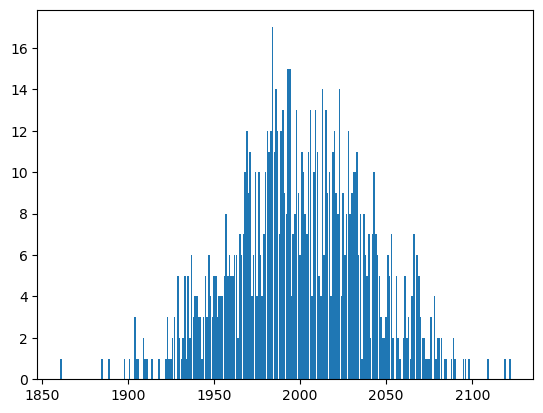

In [19]:
import numpy as np
data = np.random.binomial(n=n, p=p, size=sample_size)
draw_barchart(data)

## Q-Q Plot

#### Task: Draw a qq plot

First, generate 100 random numbers following the standard normal distribution.

In [20]:
data = np.random.normal(0, 1, 100)
data

array([ 6.88780769e-01, -6.75919947e-01,  2.93074331e-01, -5.79106081e-01,
        1.30123445e+00,  1.92256751e+00,  2.18748338e+00, -6.11089247e-01,
        5.10607792e-01,  8.00580338e-01, -1.24240878e+00, -9.72615555e-02,
        6.73447667e-01, -8.09438584e-01, -1.20924654e+00,  7.73688654e-01,
       -1.80407789e-01, -7.15272562e-01, -6.65776762e-01, -4.00240277e-01,
        1.02210373e-01, -2.81966795e-01, -8.97196635e-01,  4.47209664e-01,
       -1.69014115e-03,  1.92136642e-02,  1.41253186e-02, -2.12365755e+00,
        7.64832697e-01, -2.60131041e-01,  5.96562993e-01,  1.47781161e-01,
       -1.07644649e+00, -3.38553909e-02, -9.07882773e-01, -1.24508046e+00,
        8.18344926e-01,  7.71729707e-02,  6.41896484e-01,  6.62199941e-01,
        7.31149152e-01, -1.50388317e+00,  1.08913093e+00, -2.33995157e-01,
       -2.27931569e-01, -3.62124814e-01,  6.61629133e-01, -8.83589961e-01,
        3.97824923e-01,  2.04013503e-01,  2.28563153e+00, -1.91917671e+00,
       -1.39269263e+00, -

In [21]:
sorted_data = sorted(data)
sorted_data

[-2.1236575532874387,
 -2.080747647476771,
 -1.9191767107381565,
 -1.89796882086382,
 -1.8866241419297674,
 -1.8401166327590048,
 -1.7372371879639605,
 -1.5397517776487712,
 -1.503883168136499,
 -1.5002800761823787,
 -1.4492888475229067,
 -1.3926926303103146,
 -1.3192021781633418,
 -1.258925525364863,
 -1.2450804588596074,
 -1.2424087842288374,
 -1.2092465433932487,
 -1.0764464887650502,
 -0.9078827728846208,
 -0.89719663470337,
 -0.8835899610669683,
 -0.8248432075666484,
 -0.809438583828091,
 -0.7152725620996598,
 -0.7015787087058015,
 -0.6759199470545456,
 -0.665776761797449,
 -0.6202458447825825,
 -0.6110892465604998,
 -0.5791060808756464,
 -0.559882859329502,
 -0.40024027736886514,
 -0.36212481375958344,
 -0.32340093258470026,
 -0.28196679484650267,
 -0.27045827230771025,
 -0.2602794270814703,
 -0.26013104066177556,
 -0.23399515694560727,
 -0.22793156937506365,
 -0.21672881681285663,
 -0.18915209793830914,
 -0.18040778874228838,
 -0.16927885461205655,
 -0.15022482755817954,
 -0.121

We need to find the theoretical quantiles of the normal distribution. We expect 100 random numbers that follow a normal distribution should be evenly distributed in the 'bell shape'. We split the distribution into 100 equal segments and find the z-score corresponding to each (middle of the) segment.

In [22]:
sampling_points = (np.arange(100) + 0.5) / 100
sampling_points

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

We use scipy to compute the z-score.

In [23]:
import scipy.stats as st
sampling_theoretical_quantiles = [st.norm.ppf(p) for p in sampling_points]
sampling_theoretical_quantiles

[-2.575829303548901,
 -2.1700903775845606,
 -1.9599639845400545,
 -1.8119106729525978,
 -1.6953977102721358,
 -1.5981931399228175,
 -1.5141018876192835,
 -1.4395314709384563,
 -1.372203808998726,
 -1.3105791121681285,
 -1.2535654384704504,
 -1.200358858030859,
 -1.1503493803760079,
 -1.1030625561995975,
 -1.0581216176847767,
 -1.0152220332170279,
 -0.9741138770593092,
 -0.9345892910734802,
 -0.8964733640019162,
 -0.8596173642419115,
 -0.8238936303385574,
 -0.7891916526582226,
 -0.7554150263604693,
 -0.7224790519280627,
 -0.6903088239330339,
 -0.6588376927361878,
 -0.6280060144375695,
 -0.5977601260424784,
 -0.5680514983389829,
 -0.5388360302784503,
 -0.5100734569685949,
 -0.4817268495847303,
 -0.45376219016987945,
 -0.4261480078412781,
 -0.39885506564233686,
 -0.37185608938507475,
 -0.34512553147047237,
 -0.31863936396437514,
 -0.2923748962268042,
 -0.26631061320409494,
 -0.2404260311423079,
 -0.21470156800174456,
 -0.18911842627279252,
 -0.16365848623314128,
 -0.13830420796140452,
 -0

Now, just plot them in a scatter plot.

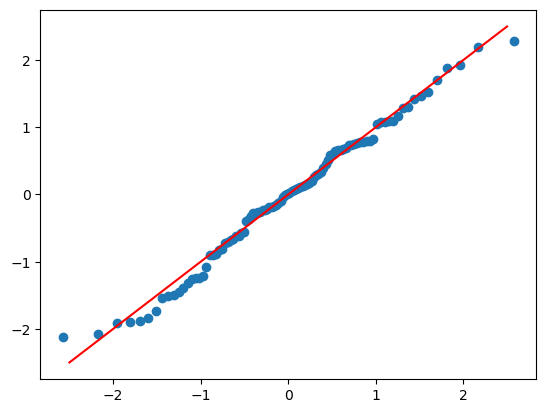

In [24]:
plt.scatter(sampling_theoretical_quantiles, sorted_data)
plt.plot([-2.5, 2.5], [-2.5, 2.5], 'r')
plt.show()

Again, double check with a library. This time, it is [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html).

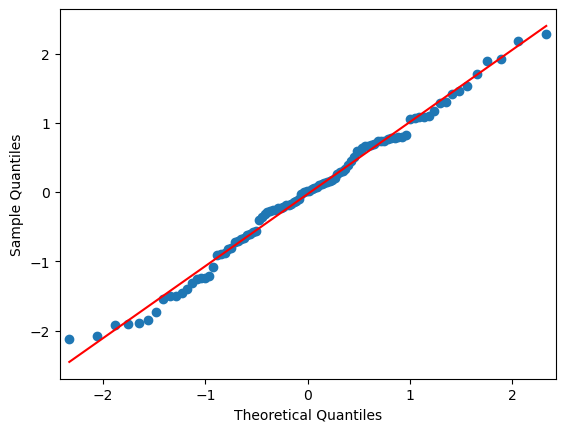

In [27]:
import statsmodels.api as sm

sm.qqplot(data, line='r')
plt.show()

A bonus third way, we draw our data against another empirical normal distribution, with very different parameters. And we still see the points following a straight line!

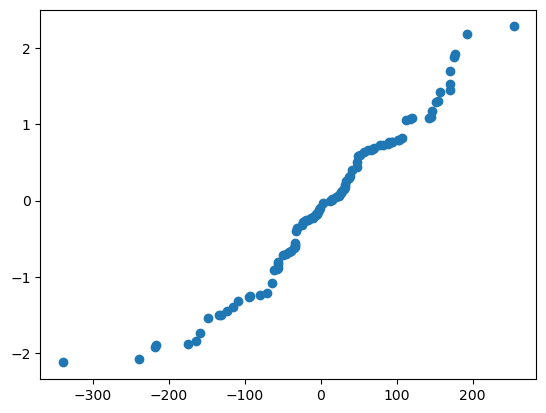

In [26]:
another_normal_data = np.random.normal(10, 101, 100)
plt.scatter(sorted(another_normal_data), sorted_data)
plt.show()